In [2]:
#!pip list
!pip install squarify

In [1]:
#!pip install Prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 40.4 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.5 MB/s eta 0:00:00


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
from prophet import Prophet
 
import warnings

plt.style.use('fivethirtyeight')
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2coding'

#마이너스 부로가 깨지지 않도록 설절 
matplotlib.rcParams['axes.unicode_minus'] = False

#prophet의 INFO Logging 비활성화
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
#prophet의 Future warning 메세지 비활성화 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
file_path = './data_set/출입국_항구_내외국인_성별_국제이동_연간__20241213140710.csv'
data = pd.read_csv(file_path,encoding='utf-8')
data.tail()

,시점,출입국항별,내외국인별,성별,항목,데이터
179,2023,인천공항,내국인,여자,출국자,118599
180,2023,인천공항,외국인,남자,입국자,238300
181,2023,인천공항,외국인,남자,출국자,148900
182,2023,인천공항,외국인,여자,입국자,181388
183,2023,인천공항,외국인,여자,출국자,130769


In [21]:
ex1_data = data.copy()
ex1_data.columns = ["date","Airport_name","type1","gender","type2","value"]
ex1_data.tail()

,date,Airport_name,type1,gender,type2,value
179,2023,인천공항,내국인,여자,출국자,118599
180,2023,인천공항,외국인,남자,입국자,238300
181,2023,인천공항,외국인,남자,출국자,148900
182,2023,인천공항,외국인,여자,입국자,181388
183,2023,인천공항,외국인,여자,출국자,130769


In [22]:
ex1_data["date"] = pd.to_datetime(ex1_data["date"], format="%Y")
ex1_data.tail()

,date,Airport_name,type1,gender,type2,value
179,2023-01-01,인천공항,내국인,여자,출국자,118599
180,2023-01-01,인천공항,외국인,남자,입국자,238300
181,2023-01-01,인천공항,외국인,남자,출국자,148900
182,2023-01-01,인천공항,외국인,여자,입국자,181388
183,2023-01-01,인천공항,외국인,여자,출국자,130769


In [23]:
ex1_data = ex1_data[ex1_data['type1'] == '외국인']
ex1_data = ex1_data.groupby(['date','type1','type2'])['value'].sum().reset_index()
ex2_data = ex1_data[ex1_data['type2']=='입국자'].copy()
ex3_data = ex1_data[ex1_data['type2']=='출국자'].copy()

             value
date              
2001-01-01  108662
2002-01-01  135099
2003-01-01  140375
2004-01-01  149826
2005-01-01  214051


<Axes: title={'center': '2001년~2023년 인천공항 입국 외국인 차트'}, xlabel='date'>

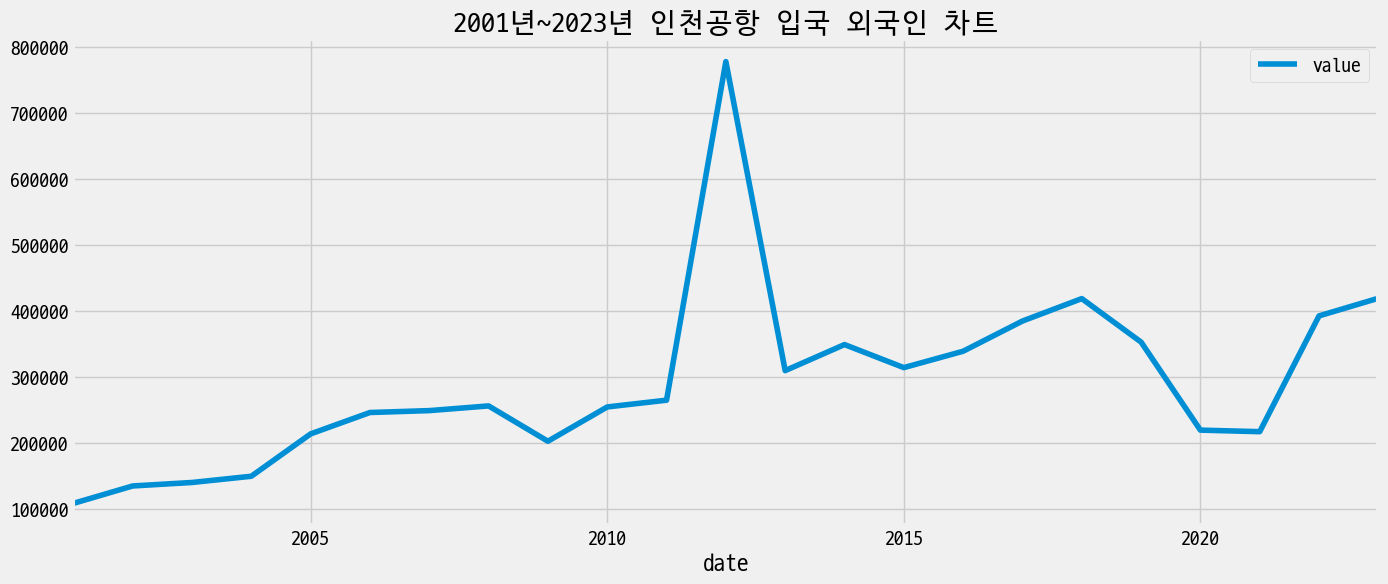

In [24]:
ex2_plot_data = ex2_data.set_index('date')[['value']]
print(ex2_plot_data.head())
ex2_plot_data.plot(figsize=(15,6), title="2001년~2023년 인천공항 입국 외국인 차트")

             value
date              
2001-01-01   72896
2002-01-01   97493
2003-01-01  134088
2004-01-01  123698
2005-01-01  229675


<Axes: title={'center': '2001년~2023년 인천공항 출국 외국인 차트'}, xlabel='date'>

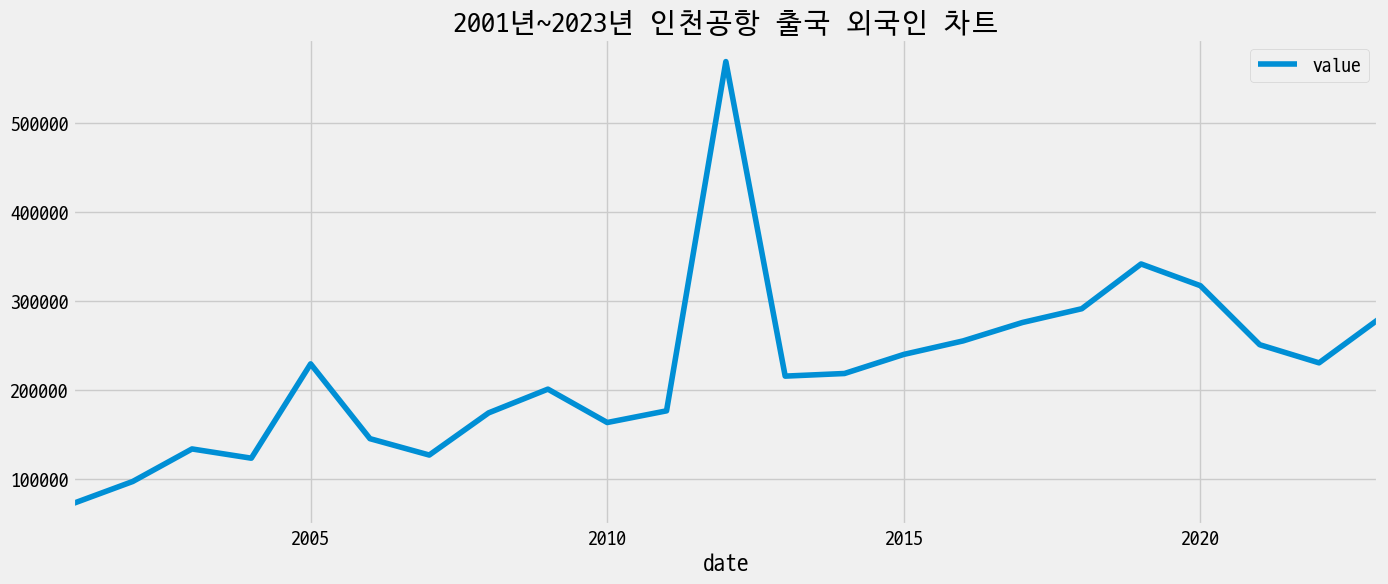

In [25]:
ex3_plot_data = ex3_data.set_index('date')[['value']]
print(ex3_plot_data.head())
ex3_plot_data.plot(figsize=(15,6), title="2001년~2023년 인천공항 출국 외국인 차트")

             value
date              
2001-01-01  181558
2002-01-01  232592
2003-01-01  274463
2004-01-01  273524
2005-01-01  443726


<Axes: title={'center': '2001년~2023년 인천공항 외국인 전체 이용객 차트'}, xlabel='date'>

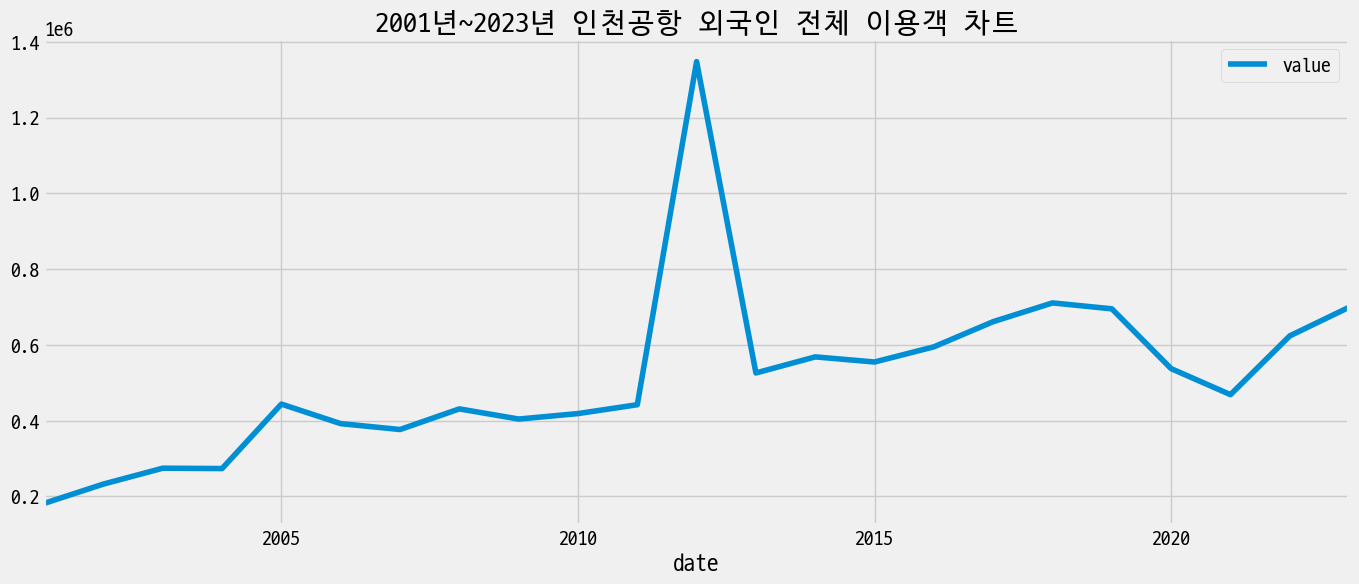

In [27]:
ex4_data = ex1_data.copy()
ex4_data = ex4_data.groupby(['date','type1'],as_index=False).sum().reset_index()
ex4_plot_data = ex4_data.set_index('date')[['value']]
print(ex_4plot_data.head())
ex4_plot_data.plot(figsize=(15,6), title="2001년~2023년 인천공항 외국인 전체 이용객 차트")

             value
date              
2001-01-01  181558
2002-01-01  232592
2003-01-01  274463
2004-01-01  273524
2005-01-01  443726


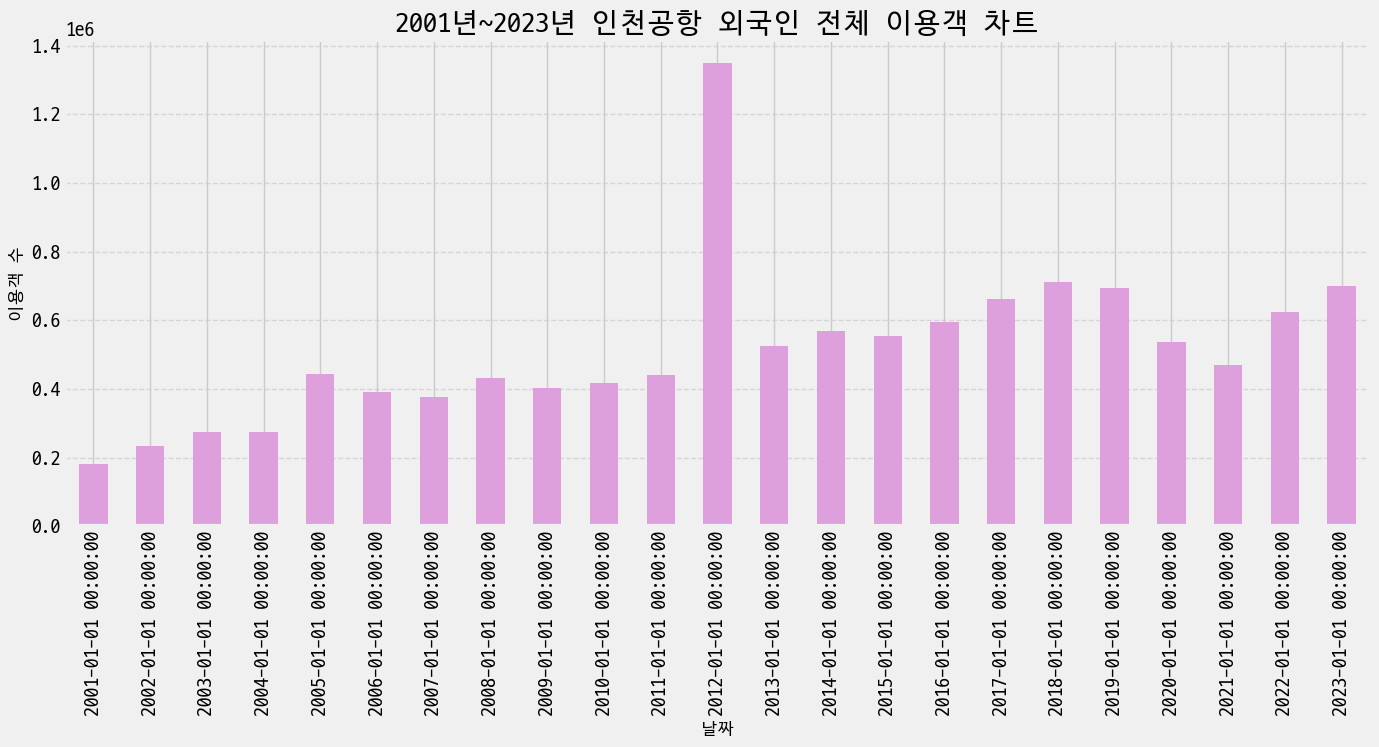

In [31]:
import matplotlib.pyplot as plt
ex4_data = ex1_data.copy()
ex4_data = ex4_data.groupby(['date','type1'],as_index=False).sum().reset_index()
ex_4plot_data = ex4_data.set_index('date')[['value']]
print(ex_4plot_data.head())
ex_4plot_data.plot(
    kind='bar',                # 막대그래프 지정
    figsize=(15, 6),           # 그래프 크기
    title="2001년~2023년 인천공항 외국인 전체 이용객 차트", 
    color='plum',           # 막대 색상
    legend=False               # 범례 제거
)

plt.xlabel("날짜", fontsize=12)  # X축 레이블
plt.ylabel("이용객 수", fontsize=12)  # Y축 레이블
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Y축 그리드 추가
plt.show()

In [13]:
ex5_data = ex4_data.copy()
# 페이스북에서는 date는 ds, value는 y로 사용해야 함. 열이름 수정.
ex5_data = ex5_data.rename(columns={"date":"ds","value":"y"})
ex5_data.head()

,index,ds,type1,type2,y
0,0,2001-01-01,외국인,입국자출국자,181558
1,1,2002-01-01,외국인,입국자출국자,232592
2,2,2003-01-01,외국인,입국자출국자,274463
3,3,2004-01-01,외국인,입국자출국자,273524
4,4,2005-01-01,외국인,입국자출국자,443726


In [14]:
m = Prophet() #페이스북 예측모듈 
m.fit(ex5_data) #학습시킴 

09:10:53 - cmdstanpy - INFO - Chain [1] start processing
09:10:53 - cmdstanpy - INFO - Chain [1] done processing


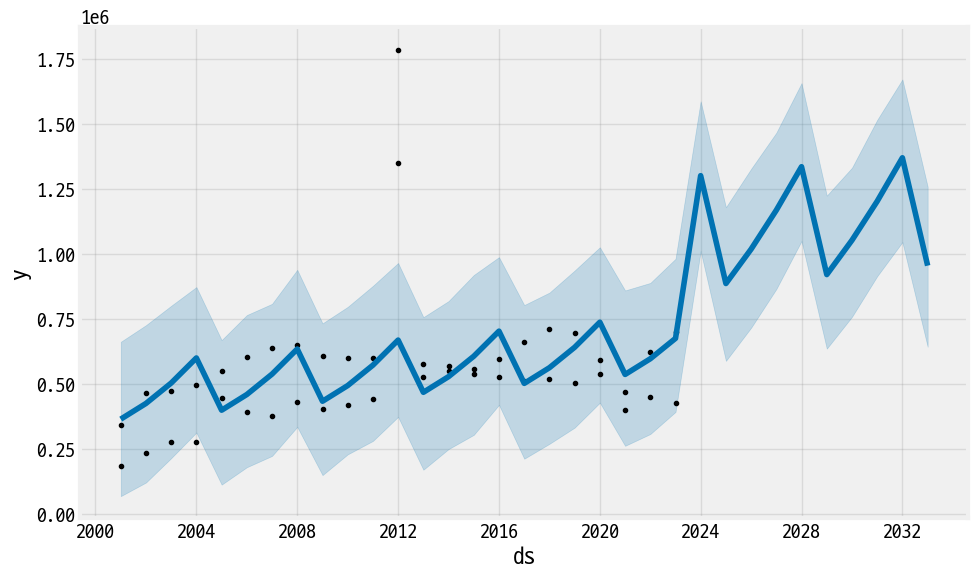

In [21]:
future = m.make_future_dataframe(periods=10, freq='Y')
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.show()